In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from utils.data_util import get_dataset_name_list, get_dataset_info, get_mnist, dataset_lim_dict
from utils.method_util import get_method_name_list, classify_proc, get_method_dict
from utils.plot_util import plot_lines
import os
import warnings
warnings.filterwarnings('ignore')

D_COIL20, D_DIGITS, D_USPS, D_OLI, D_YALE, D_MNIST, D_BASEHOCK, D_PCMAC, D_RELATHE = get_dataset_name_list()
S_SPCA_AL, S_SPCA_PSP, S_SPCA_VP, S_SPCA_N, S_SPCA_ACC = get_method_name_list()

pd.set_option('display.max_columns', None)

data_name = D_MNIST
DATASET_PATH = os.path.join(os.getcwd(), 'data')
if not os.path.exists(os.path.join(DATASET_PATH, f'{D_MNIST}.mat')):
    data, label = get_mnist(path=DATASET_PATH)

Processing Coil20 dataset
Parameter setting: max iter(100), tol(0.0001), svd_e(False), step(None, 0.5), init(rand)
Generating initialization matrix, seed: 1, svd efficient: False
Init time cost: 0.81s


Processing SPCA ACC: 100%|██████████| 5/5 [01:44<00:00, 20.81s/it]   


                   AC  n_iter       Time        Ta         Tb      Tacc
SPCA AL      0.990741      17  17.414618  0.035350  17.289726  0.000000
SPCA PSP     0.969907      12   1.264813  0.029429   1.035260  0.000000
SPCA VP      0.935185     100   1.306333  0.184665   0.061649  0.000000
SPCA Newton  0.983796      25   0.345245  0.047333   0.003173  0.000000
SPCA ACC     0.983796      17   0.232325  0.031246   0.003883  0.001016


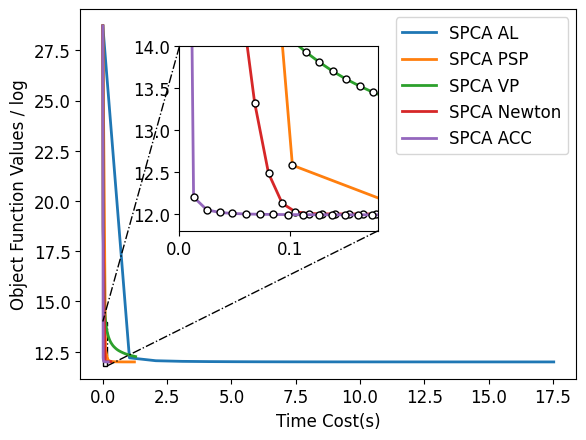

In [3]:
def ret_comp_res(data, label, setting, repeat=5, plot=False):
    """
    Perform classify experiments using algorithms with specified parameter configurations
    and return the corresponding experimental results.

    Args:
        data (np.ndarray): Input data matrix (n * m).
        label (list): True labels for the data.
        setting (dict): Dictionary containing the parameter settings.
        repeat (int): Number of times the process is repeated
        plot (bool): whether to plot curves
    """
    len_obj_list, obj_list, res_list, total_time_list, total_obj_list = 0, [], [], [], []
    init, max_iter, tol, svd_e = setting['init'], setting['max_iter'], setting['tol'], setting['svd_e']
    p_dict = get_method_dict(data=data, n_comp=n_comp, init=init, max_iter=max_iter,
                             tol=tol, svd_e=svd_e, seed=global_seed)
    tqdm_iter = tqdm(p_dict.items())
    for m_i, p_i in tqdm_iter:
        tqdm_iter.set_description(f'Processing {m_i}')
        metric, obj, p_time, t, ta, tb, tacc = classify_proc(data=data, d_label=label, p_method=m_i, params=p_i,
                                                             repeat=repeat)
        total_time_list.append(np.cumsum(t))
        total_obj_list.append(obj_list)
        metric.extend([len(obj) - 1, p_time, np.sum(ta), np.sum(tb), np.sum(tacc)])
        if len(obj) > len_obj_list:
            len_obj_list = len(obj)
        obj_list.append(obj)
        res_list.append(metric)
    res = pd.DataFrame(res_list, index=p_dict.keys(), columns=['AC', 'n_iter', 'Time', 'Ta', 'Tb', 'Tacc'])
    print(res)
    res.to_csv(rf'D:\Project\python\SPCA2\res\exp_time_cost_{data_name}_{repeat}.csv', index=False)  # TODO
    data_plot = []
    for i, p_key in enumerate(p_dict.keys()):
        data_plot.append([p_key, (total_time_list[i], np.log(obj_list[i]))])
    if plot:
        lim = dataset_lim_dict[data_name]
        plot_lines(data_plot, label_x='Time Cost(s)', label_y='Object Function Values / log', lim=lim)


setting_dict = {
    'init': 'rand',  # Initialization method
    'max_iter': 100,  # Maximum number of iterations
    'tol': 1e-4,  # Tolerance for convergence
    'svd_e': False,  # Whether to use effective SVD (for large dataset) in initialization
    'repeat': 5,  # Number of times the process is repeated; time cost will be the average of these repeats
}

DATASET_PATH = os.path.join(os.getcwd(), 'data')
# data_list = [D_COIL20, D_DIGITS, D_USPS, D_OLI, D_YALE, D_MNIST, D_BASEHOCK, D_PCMAC, D_RELATHE]
data_list = [D_COIL20]  # add or delete datasets here
for data_name in data_list:
    data, label, n_comp = get_dataset_info(dir=DATASET_PATH, name=data_name)
    global_seed = 1
    print(f"Processing {data_name} dataset")
    ret_comp_res(data, label, setting_dict, repeat=setting_dict['repeat'], plot=True)

Processing Coil20 dataset
Parameter setting: max iter(500), tol(0.0001), svd_e(False), step(None, 0.5), init(rand)
Generating initialization matrix, seed: 1, svd efficient: False
Init time cost: 0.83s


Param Value: 1e-07: 100%|██████████| 4/4 [00:17<00:00,  4.44s/it]


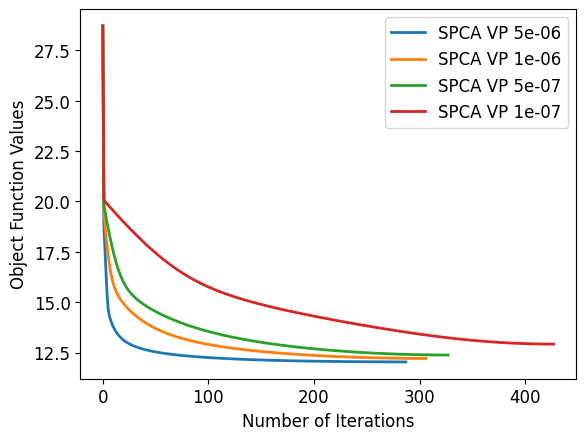

                   Acc      Time  n_iter
5.000000e-06  0.976852  3.720497     287
1.000000e-06  0.967593  3.988452     306
5.000000e-07  0.958333  4.315408     327
1.000000e-07  0.902778  5.472339     427
Parameter setting: max iter(500), tol(0.0001), svd_e(False), step(None, 0.5), init(rand)
Generating initialization matrix, seed: 1, svd efficient: False
Init time cost: 0.95s


Param Value: 0.5: 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


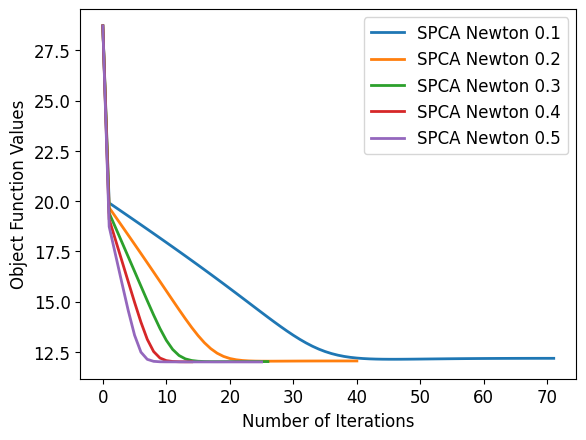

          Acc      Time  n_iter
0.1  0.983796  0.869628      71
0.2  0.983796  0.566798      40
0.3  0.981481  0.342333      26
0.4  0.986111  0.204432      14
0.5  0.983796  0.367194      25
Parameter setting: max iter(500), tol(0.0001), svd_e(False), step(None, 0.5), init(rand)
Generating initialization matrix, seed: 1, svd efficient: False
Init time cost: 0.81s


Param Value: 0.5: 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]


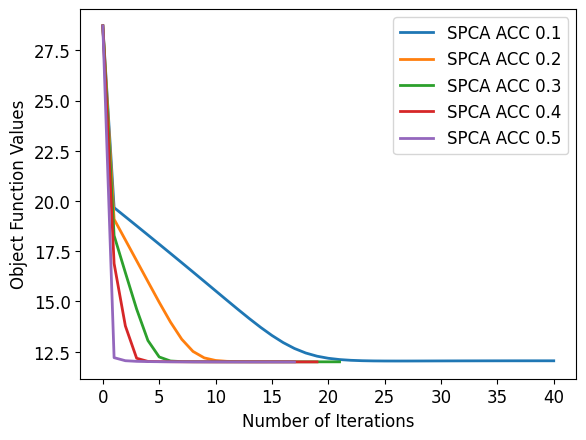

          Acc      Time  n_iter
0.1  0.981481  0.506438      40
0.2  0.986111  0.260703      17
0.3  0.983796  0.304738      21
0.4  0.983796  0.260191      19
0.5  0.983796  0.260392      17


In [5]:
def exp_params_iter_comp(data, label, setting, data_name, p_method=S_SPCA_ACC, plot=False):
    init, max_iter, tol, svd_e = setting['init'], setting['max_iter'], setting['tol'], setting['svd_e']
    p_dict = get_method_dict(data=data, n_comp=n_comp, init=init, max_iter=max_iter,
                             tol=tol, svd_e=svd_e, seed=global_seed)
    if p_method in [S_SPCA_VP, S_SPCA_N, S_SPCA_ACC]:
        param = p_dict[p_method]
    else:
        raise ValueError('Wrong method chose')
    if param.get_newton():
        p_iter = [1e-1, 2e-1, 3e-1, 4e-1, 5e-1]
    else:
        if data_name in [D_COIL20, D_RELATHE, D_PCMAC]:
            p_iter = [5e-6, 1e-6, 5e-7, 1e-7]
        elif data_name in [D_USPS, D_OLI, D_BASEHOCK]:
            p_iter = [1e-6, 5e-7, 1e-7, 5e-8]
        elif data_name in [D_YALE]:
            p_iter = [1e-5, 5e-6, 1e-6, 5e-7]
        elif data_name in [D_MNIST]:
            p_iter = [5e-7, 1e-7, 5e-8, 1e-8]
        elif data_name in [D_DIGITS]:
            p_iter = [1e-4, 5e-5, 1e-5, 5e-6]
        else:
            raise ValueError(f"Wrong dataset name: {data_name}")
    res = ret_params_comp_res(data=data, label=label, p_iter=p_iter, m_name=p_method, param=param, plot=plot)
    print(res[['Acc', 'Time', 'n_iter']])


def ret_params_comp_res(data, label, p_iter, m_name, param, plot=False):
    len_obj_list, obj_list, res_list = 0, [], []
    tqdm_iter = tqdm(p_iter)
    for p in tqdm_iter:
        tqdm_iter.set_description(f'Param Value: {p}')
        p_param = param.copy()
        p_param.set_step(step=p)
        if p_param.get_newton():
            p_param.set_acc_step(step=p)
        metric, obj, p_time, _, _, _, _ = classify_proc(data, label, p_method=m_name, params=p_param)
        metric.extend([obj, obj[-1], p_time, len(obj) - 1])
        if len(obj) > len_obj_list:
            len_obj_list = len(obj)
        obj_list.append(obj)
        res_list.append(metric)
    data_plot = []
    for i, p in enumerate(p_iter):
        data_plot.append([f'{m_name} {p}', [np.arange(len(obj_list[i])), np.log(obj_list[i])]])
    if plot:
        plot_lines(data_plot, label_x='Number of Iterations', label_y='Object Function Values')
    return pd.DataFrame(res_list, index=p_iter, columns=['Acc', 'Obj', 'Last Obj', 'Time', 'n_iter'])


setting_dict = {
    'init': 'rand',
    'max_iter': 500,
    'tol': 1e-4,
    'svd_e': False,
}


DATASET_PATH = os.path.join(os.getcwd(), 'data')
# data_list = [D_COIL20, D_DIGITS, D_USPS, D_OLI, D_YALE, D_MNIST, D_BASEHOCK, D_PCMAC, D_RELATHE]
data_list = [D_COIL20]  # add or delete datasets here
method_list = [S_SPCA_VP, S_SPCA_N, S_SPCA_ACC]
for data_name in data_list:
    data, label, n_comp = get_dataset_info(dir=DATASET_PATH, name=data_name)
    global_seed = 1
    print(f"Processing {data_name} dataset")
    for method in method_list:
        exp_params_iter_comp(data, label, setting_dict, data_name=data_name, p_method=method, plot=True)